In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r"C:\Users\pc\Desktop\Data Science Assignments\Forcasting\CocaCola_Sales_Rawdata.xlsx")
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [10]:
data['quarters'] = data.Quarter.apply(lambda x : x.split('_')[0])
data['years'] = data.Quarter.apply(lambda x : x.split('_')[1])
data.head()

,Quarter,Sales,quarters,years
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


<AxesSubplot:>

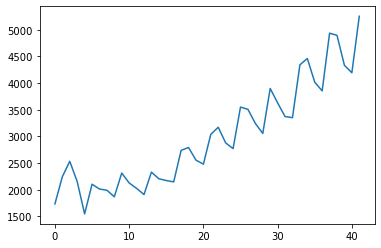

In [11]:
data.Sales.plot()

<AxesSubplot:xlabel='quarters', ylabel='Sales'>

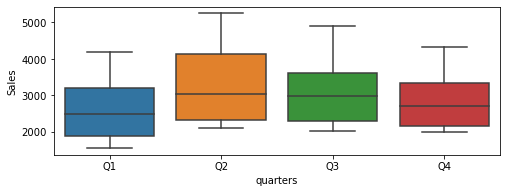

In [13]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='quarters',y='Sales',data=data)

<AxesSubplot:xlabel='years', ylabel='Sales'>

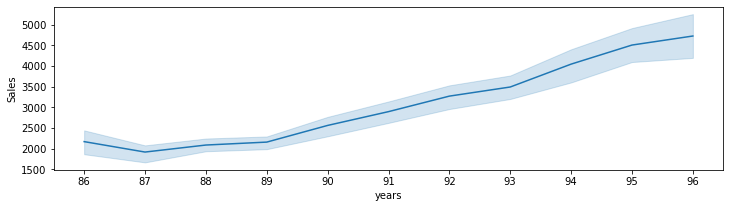

In [14]:
plt.figure(figsize=(12,3))
sns.lineplot(x='years',y='Sales',data=data)

In [15]:
data.tail()

,Quarter,Sales,quarters,years
37,Q2_95,4936.0,Q2,95
38,Q3_95,4895.0,Q3,95
39,Q4_95,4333.0,Q4,95
40,Q1_96,4194.0,Q1,96
41,Q2_96,5253.0,Q2,96


# Decomposing Data

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots

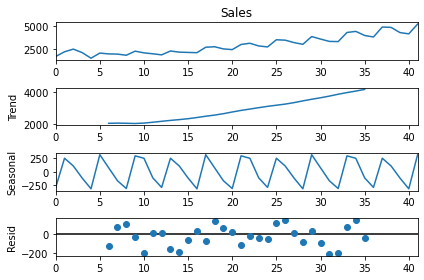

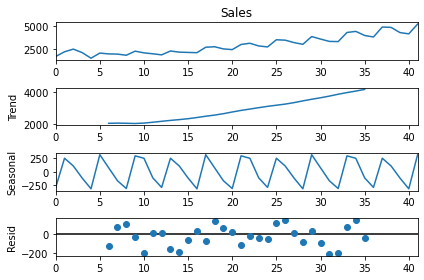

In [17]:
decompose_ts=seasonal_decompose(data['Sales'],period=12)
decompose_ts.plot()

# Autocorrelation and Partial Autocorrelation

In [18]:
import statsmodels.graphics.tsaplots as tsa_plots

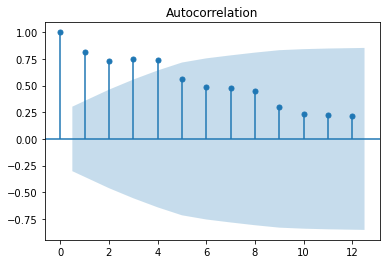

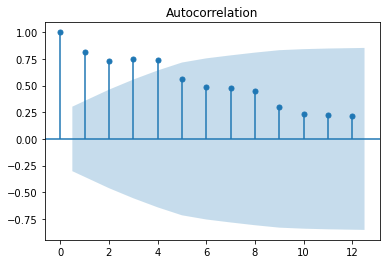

In [19]:
tsa_plots.plot_acf(data.Sales,lags=12)

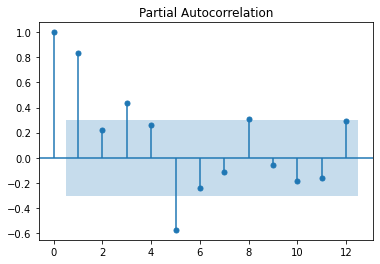

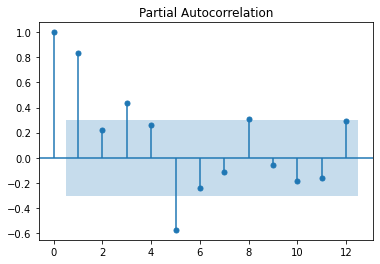

In [20]:
tsa_plots.plot_pacf(data.Sales,lags=12)

# Simple Moving average

<AxesSubplot:>

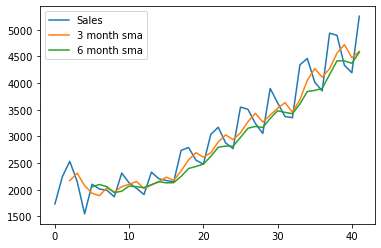

In [21]:
data['3 month sma']=data.Sales.rolling(window=3).mean()
data['6 month sma']=data.Sales.rolling(window=6).mean()
data.plot()

# spliting data

In [22]:
train_data=data.iloc[:29]
test_data=data.iloc[29:]

<AxesSubplot:>

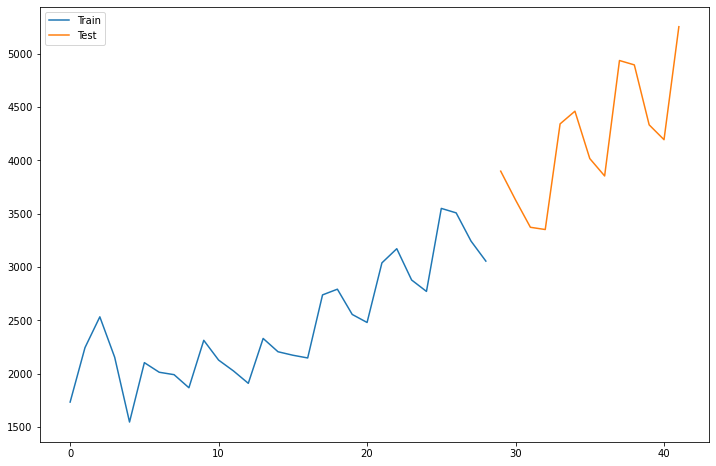

In [23]:
train_data.Sales.plot(legend=True,label='Train')
test_data.Sales.plot(legend=True,label='Test',figsize=(12,8))

# fitting models

###### Holts winter's method

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [29]:
model=ExponentialSmoothing(train_data.Sales,trend='add',seasonal='add',seasonal_periods=12).fit()

In [47]:
test_prediction=model.predict(12)
test_prediction

12    1920.255124
13    2388.512214
14    2430.307137
15    2015.206179
16    1800.190913
17    2647.081852
18    2669.315759
19    2681.595687
20    2479.016197
21    2986.671481
22    2946.266654
23    2964.241713
24    2774.300372
25    3249.829940
26    3645.550325
27    3315.832367
28    2872.409189
dtype: float64

<AxesSubplot:>

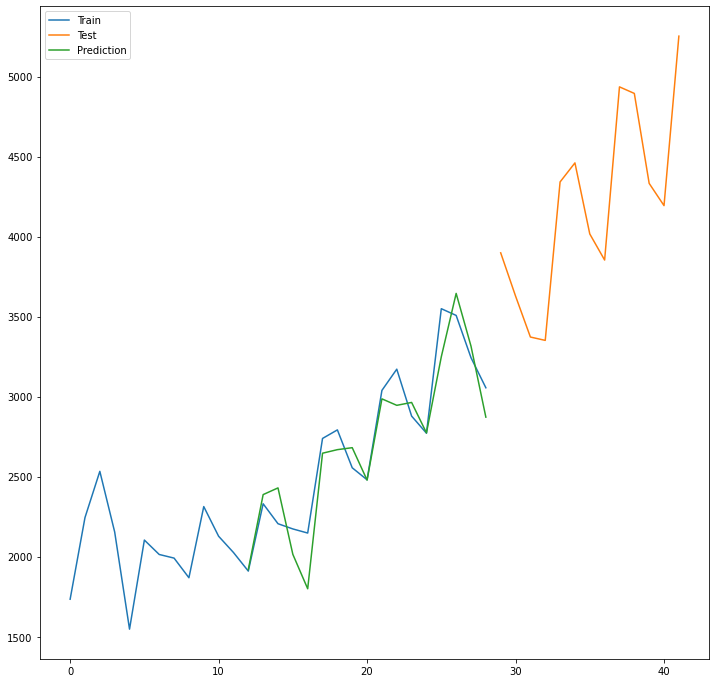

In [48]:
train_data['Sales'].plot(legend=True,label='Train')
test_data['Sales'].plot(legend=True,label='Test',figsize=(12,12))
test_prediction.plot(legend=True,label='Prediction')

In [51]:
model1=ExponentialSmoothing(train_data.Sales,trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [52]:
test_prediction=model1.predict(12)
test_prediction

12    1755.707375
13    2344.812117
14    2638.058948
15    2106.878674
16    1658.988995
17    2574.513755
18    2574.346178
19    2621.200850
20    2450.905689
21    3081.711334
22    2907.474834
23    2899.793326
24    2653.347252
25    3328.239671
26    3545.271188
27    3446.467761
28    3026.147579
dtype: float64

<AxesSubplot:>

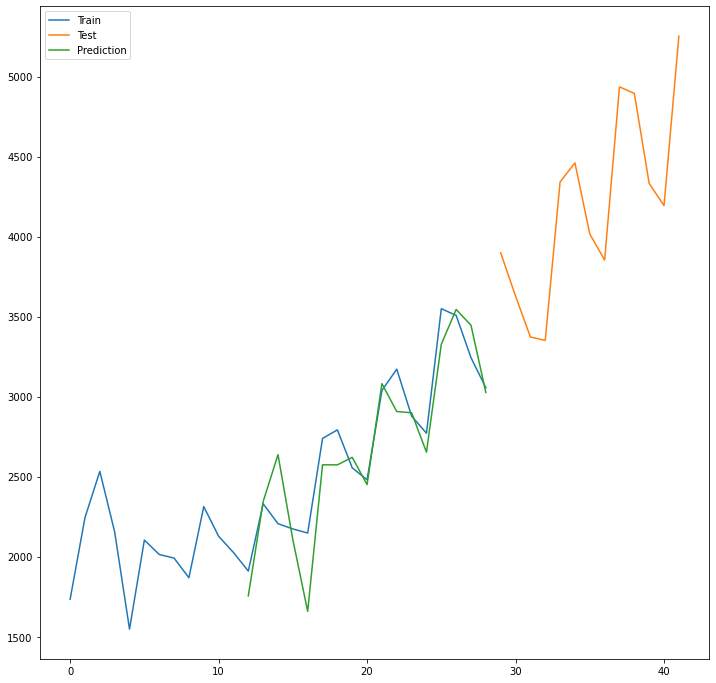

In [53]:
train_data['Sales'].plot(legend=True,label='Train')
test_data['Sales'].plot(legend=True,label='Test',figsize=(12,12))
test_prediction.plot(legend=True,label='Prediction')

In [54]:
final_model=model1=ExponentialSmoothing(data.Sales,trend='mul',seasonal='mul',seasonal_periods=12).fit()
final_prdct=final_model.predict(12)

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

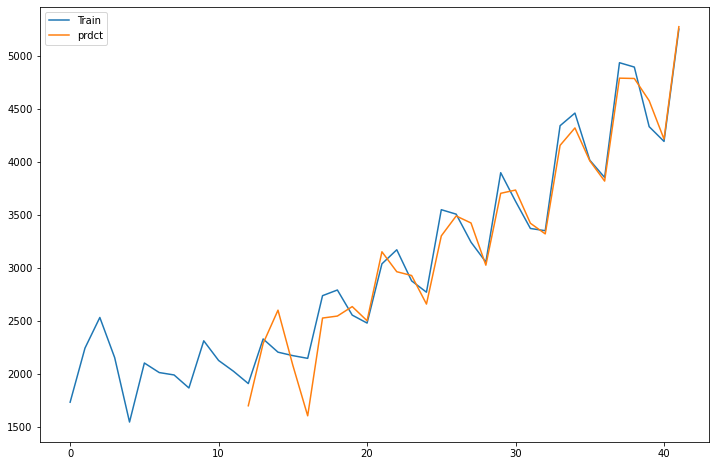

In [58]:
data['Sales'].plot(legend=True,label='Train')
final_prdct.plot(legend=True,label='prdct',figsize=(12,8))